# MollWiede projection
check simulate source distribution

In [1]:
from scipy.io import loadmat
import astropy.units as units
import astropy.coordinates as coord
import numpy as np

In [2]:
simSrc = loadmat('GWBsimDataSKASrlz1Nrlz1.mat')

In [3]:
simSrc.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Amp', 'alpha', 'delta', 'genHypothesis', 'id', 'iota', 'noise', 'omega', 'perfect_fitness', 'phi0', 'pname', 'simParams', 'snr', 'snr_chr', 'thetaN', 'timingResiduals', 'timingResiduals_tmp', 'yr'])

In [4]:
ra = simSrc['alpha']
dec = simSrc['delta']
snr = simSrc['snr_chr']

In [5]:
import matplotlib.pyplot as plt

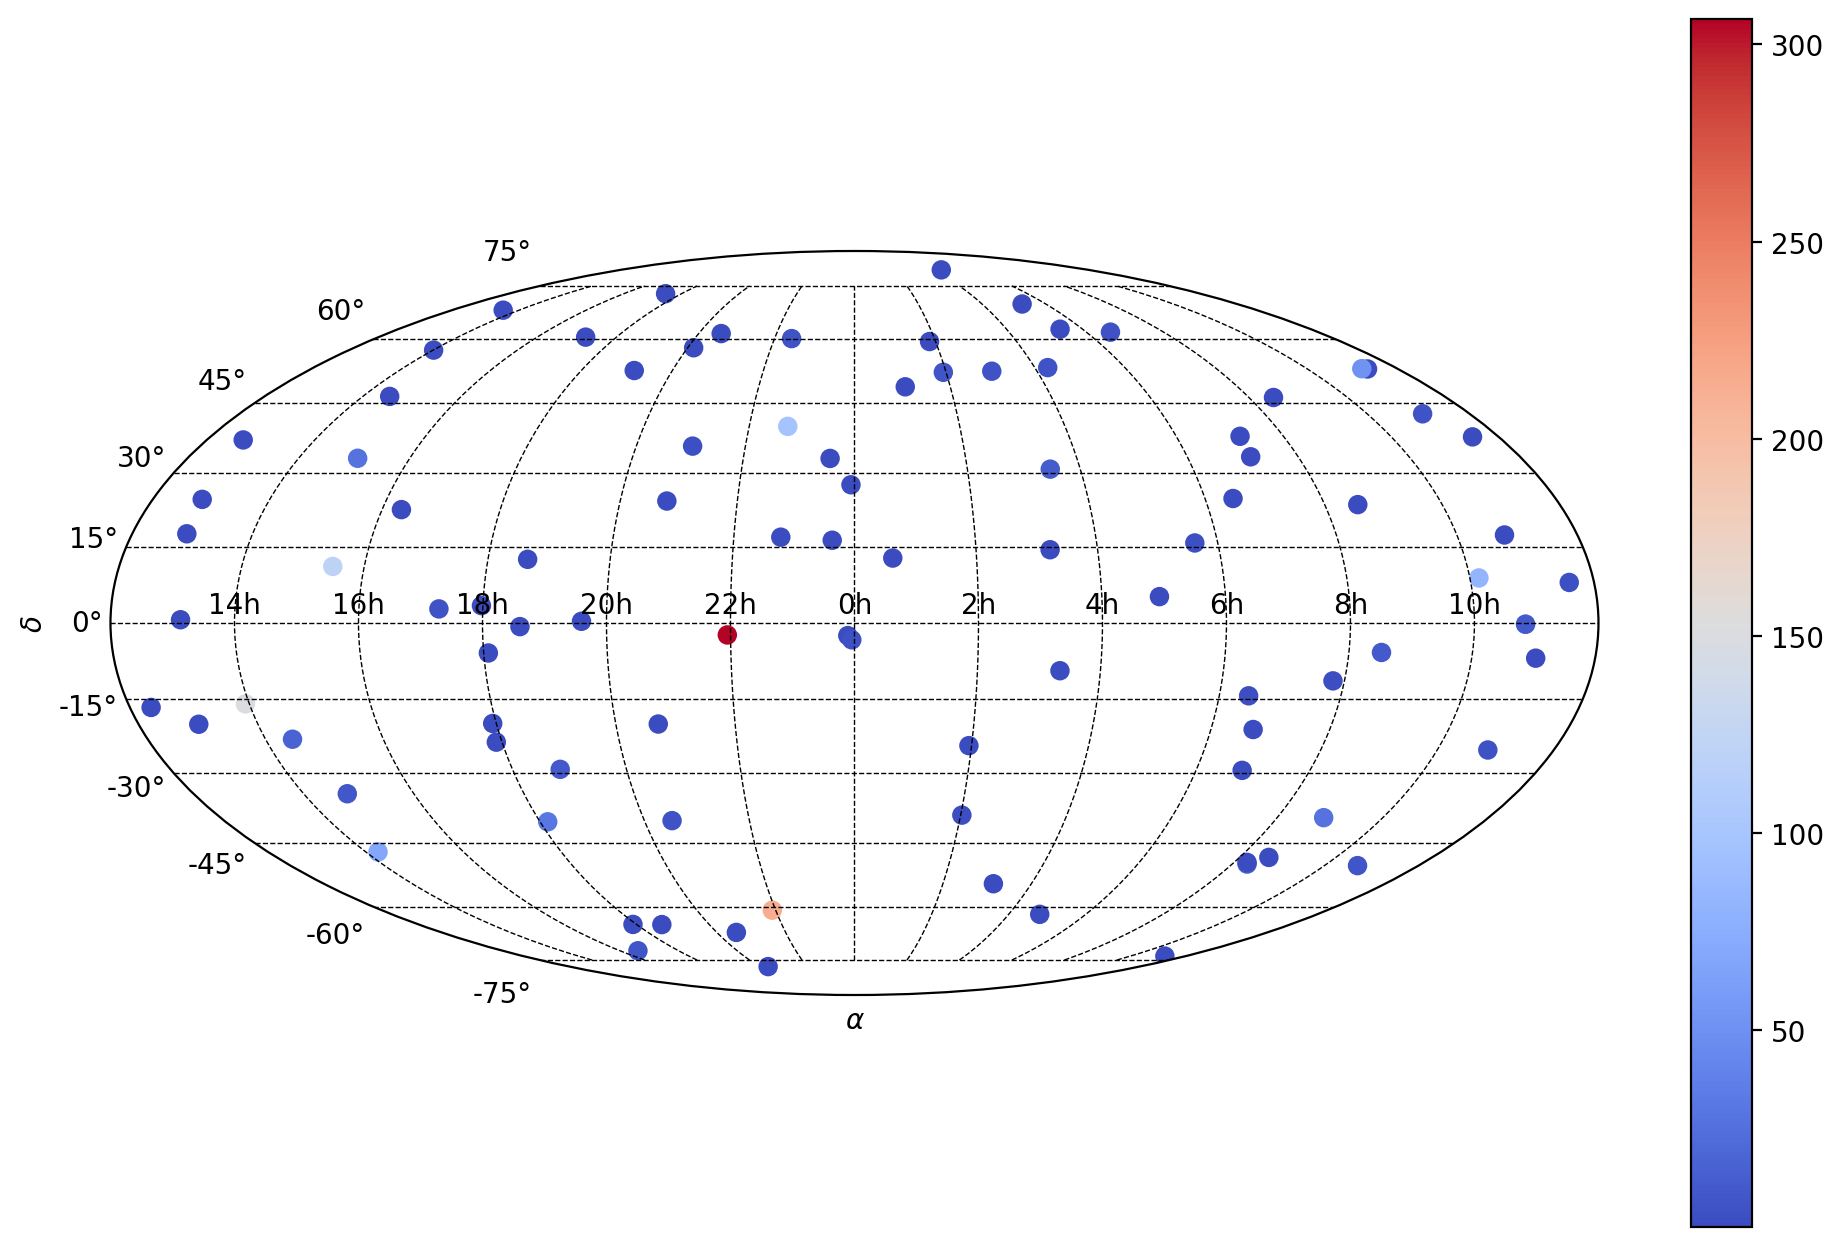

In [6]:
fig = plt.figure(figsize=(12,8), dpi=200)
ax = fig.add_subplot(111,projection='mollweide')
alpha = coord.Angle(ra*units.rad).wrap_at(180*units.degree).radian
h = ax.scatter(alpha,dec,c=snr,cmap='coolwarm')
xlab = ['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h']
ax.set_xticklabels(xlab)
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$\delta$')
ax.grid(color='k',linestyle='--',linewidth=0.5)
plt.colorbar(h)
fig.savefig('SourceDist.svg',dpi=300)

# iMBLT results

In [7]:
repSrc = loadmat('./results_iMBLT/repSrc_sky.mat')
cfrSrc = loadmat('./results_iMBLT/CnfrmSrc_sky.mat')
matSrc = loadmat('./results_iMBLT/matSrc_sky.mat')
simSrc_nm = loadmat('./results_iMBLT/simSrc_nm_sky.mat')

In [8]:
repSrc.keys()

dict_keys(['__header__', '__version__', '__globals__', 'repDec', 'repRA', 'repSNR'])

In [9]:
cfrSrc.keys()

dict_keys(['__header__', '__version__', '__globals__', 'idDec', 'idRA', 'idSNR'])

In [10]:
matSrc.keys()

dict_keys(['__header__', '__version__', '__globals__', 'matched_alpha_rep', 'matched_dec_rep', 'matched_snr_rep'])

In [11]:
simSrc_nm.keys()

dict_keys(['__header__', '__version__', '__globals__', 'simDec_nm', 'simRA_nm'])

In [12]:
repRA = repSrc['repRA']
repDec = repSrc['repDec']
repSNR = repSrc['repSNR']
cnfrmRA = cfrSrc['idRA']
cnfrmDec = cfrSrc['idDec']
cnfrmSNR = cfrSrc['idSNR']
matRA = matSrc['matched_alpha_rep']
matDec = matSrc['matched_dec_rep']
matSNR = matSrc['matched_snr_rep']
simRA_nm = simSrc_nm['simRA_nm']
simDec_nm = simSrc_nm['simDec_nm']

In [13]:
len(repRA[0])

20

In [14]:
matRA[0]

array([5.745963, 5.737276, 3.648646, 4.054366, 5.951442, 2.656207,
       2.833166, 2.935203, 4.750752, 3.943503, 3.730968, 2.232367,
       3.668355, 3.730968, 3.036299, 3.730968, 3.730968, 3.730968,
       4.870517, 3.730968])

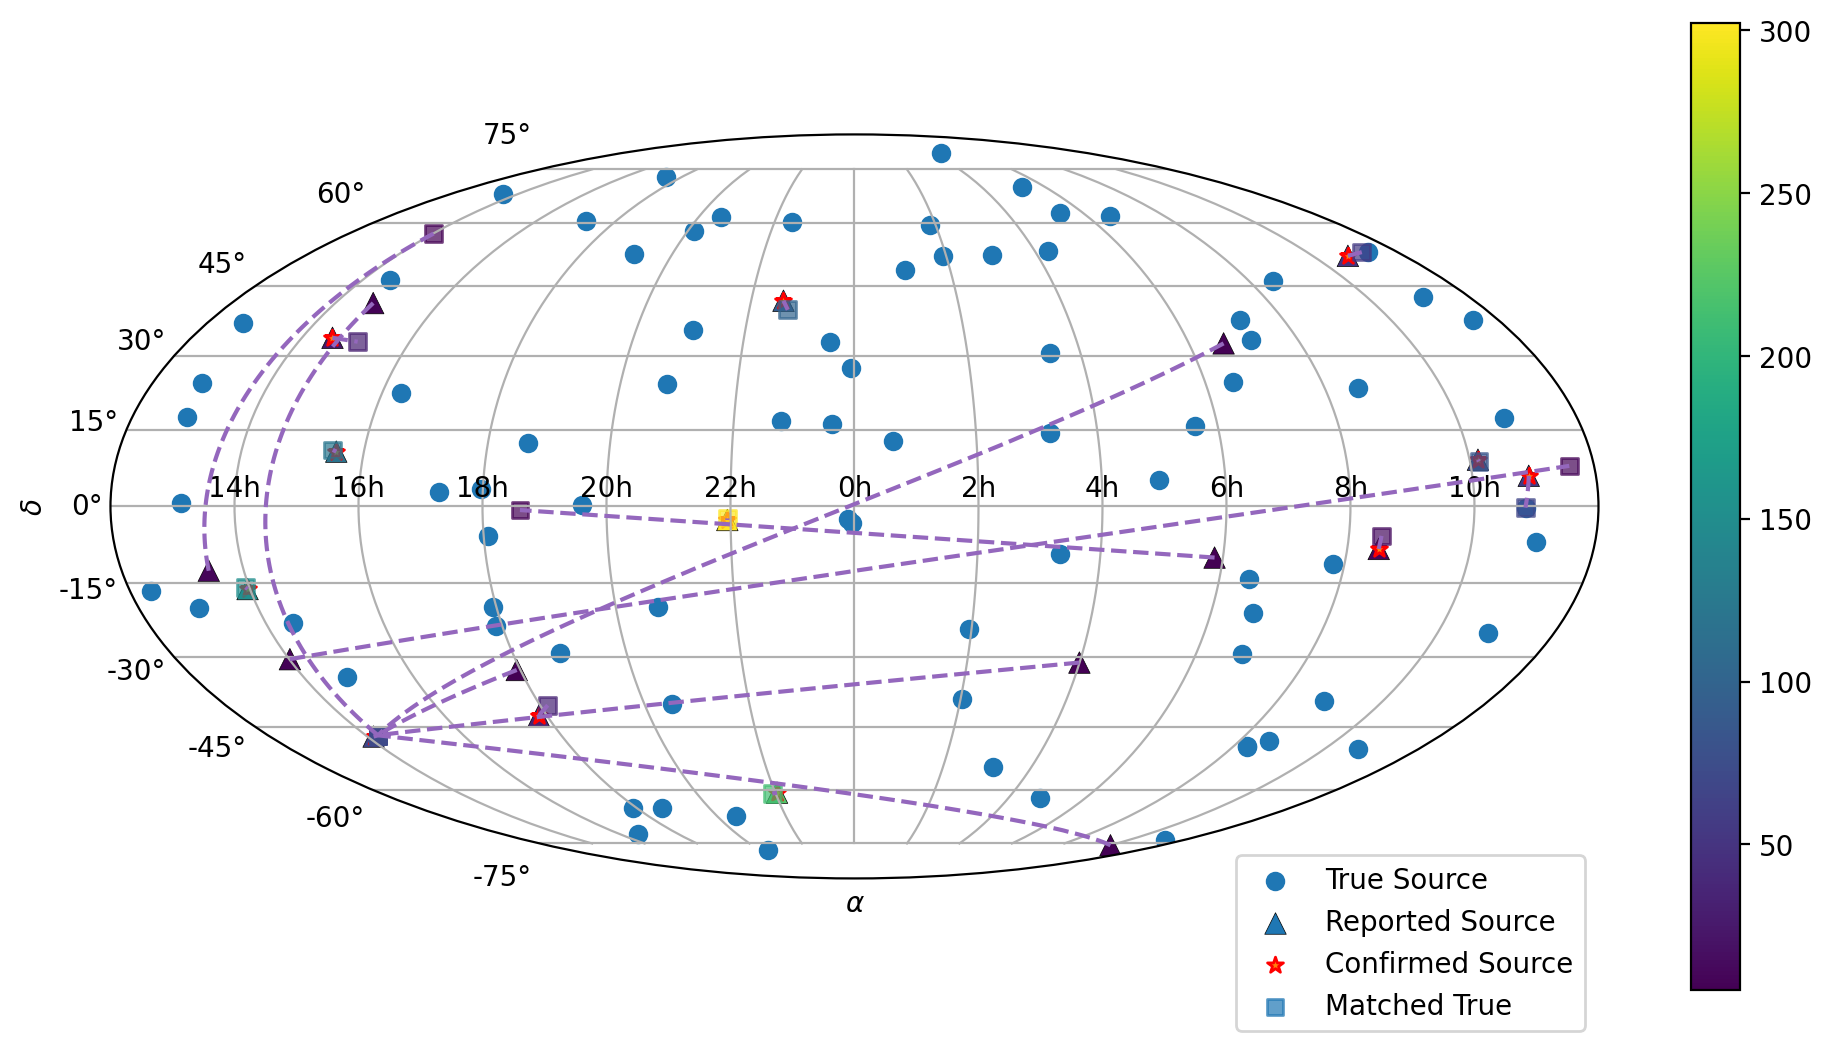

In [20]:
fig = plt.figure(figsize=(12,8),dpi=200)
ax = fig.add_subplot(111, projection='mollweide')

alpha_rep = coord.Angle(repRA * units.rad).wrap_at(180 * units.degree).radian
alpha_cnfrm = coord.Angle(cnfrmRA * units.rad).wrap_at(180 * units.degree).radian
alpha_mat = coord.Angle(matRA * units.rad).wrap_at(180 * units.degree).radian
alpha_sim_nm = coord.Angle(simRA_nm * units.rad).wrap_at(180 * units.degree).radian

f1 = ax.scatter(alpha_sim_nm,simDec_nm,label='True Source')
f2 = ax.scatter(alpha_rep,repDec,c=repSNR,cmap='viridis',marker='^',s=60,edgecolor='k',lw=.25,label='Reported Source') # using up triangle for reported sources
f3 = ax.scatter(alpha_cnfrm,cnfrmDec,marker='*',edgecolor='r',label='Confirmed Source') # solid cricle for confirmed sources
f4 = ax.scatter(alpha_mat,matDec,c=matSNR,cmap='viridis',marker='s', label='Matched True',alpha=0.7) # square for matched true sources

for i in range(len(repRA[0])):
    plt.plot([alpha_rep[0][i], alpha_mat[0][i]],[repDec[0][i], matDec[0][i]], ls='--', color = 'C4')

ax.set_xticklabels(xlab)
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$\delta$')
ax.grid(True)
fig.colorbar(f2,shrink=0.8)
ax.legend(bbox_to_anchor=(1.0,.05))
fig.savefig('MollWeide.svg',dpi=300)